In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = str(1)

In [2]:
import tensorflow_probability.substrates.jax as tfp
import flax.linen as nn
import jax
import jax.numpy as jnp
import optax
from functools import partial
import seaborn as sns
import tensorflow as tf

dist = tfp.distributions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from dataloader import *
from retrain_fun import *
import datetime
import scipy.stats as st
import random
random.seed(0)
np.random.seed(0)
jax.random.PRNGKey(0)
os.environ["XLA_FLAGS"] = "--xla_gpu_deterministic_reductions --xla_gpu_autotune_level=2"
os.environ['TF_CUDNN_DETERMINISTIC']='1'


2023-07-23 18:01:05.059520: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
data_aggregated, houses = data_preprocess(only_positive=True)

In [4]:
train_list= [[2361, 7719, 9019, 2335, 7951]]
test_list= [[4373, 7901, 3456, 3538, 2818]]
pool_list=[]
for i in range(len(train_list)):
    pool = [j for j in houses if j not in train_list[i]+test_list[i]]
    pool_list.append(pool)

In [5]:
data_aggregated

,clotheswasher1,dishwasher1,air1,refrigerator1,furnace1,dataid,localminute,aggr
2407,0.000,0.001,0.005,0.120,0.006,3538,2018-01-01 00:00:00-06,0.132
2408,0.000,0.001,0.004,0.120,0.006,3538,2018-01-01 00:01:00-06,0.131
2409,0.000,0.001,0.005,0.120,0.006,3538,2018-01-01 00:02:00-06,0.132
2410,0.000,0.001,0.005,0.120,0.006,3538,2018-01-01 00:03:00-06,0.132
2411,0.000,0.001,0.005,0.119,0.006,3538,2018-01-01 00:04:00-06,0.131
...,...,...,...,...,...,...,...,...
13100534,0.002,0.001,0.000,0.004,0.003,7951,2018-02-07 15:26:00-06,0.010
13100535,0.002,0.001,0.000,0.004,0.003,7951,2018-02-07 15:27:00-06,0.010
13100536,0.002,0.001,0.000,0.011,0.003,7951,2018-02-07 15:28:00-06,0.017
13100537,0.002,0.000,0.000,0.004,0.003,7951,2018-02-07 15:29:00-06,0.009


In [6]:
pool_list

[[5746, 8565, 9278, 8156, 8386, 9160, 661, 1642, 7536, 7800]]

In [7]:
len(pool_list[0])

10

Train Set No: 1
Iteration No:  0


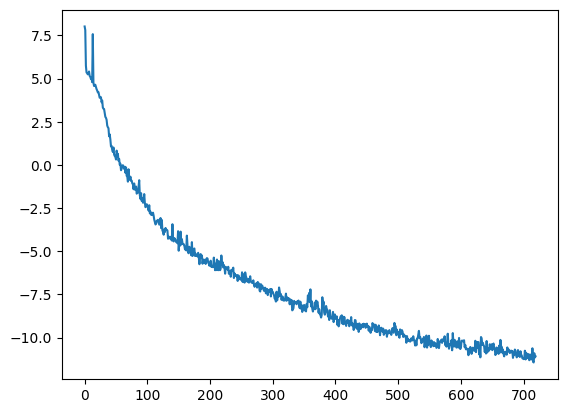

(2, 58739, 5)
RMSE : [838.97186   65.4115   283.74158   52.868984 462.44693 ] MAE  : [328.1383    41.170593 121.62969   22.690022 248.00345 ] NLL : 6362.65625
Iteration No:  1


/home/dhruv.patel/MI_multitask/retrain_fun.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278]


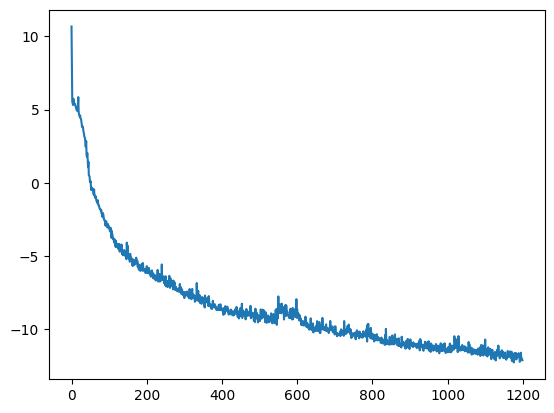

RMSE : [651.47064   63.11932  118.34574  112.265045 320.69913 ] MAE  : [259.63498   40.192894  62.075867  44.703426 154.19086 ] NLL : 5.195313930511475
Iteration No:  2


/home/dhruv.patel/MI_multitask/retrain_fun.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278 8565]


2023-07-23 18:09:22.218007: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[118349,50,99]{2,1,0}, u8[0]{0}) custom-call(f32[118349,40,99]{2,1,0}, f32[50,40,5]{2,1,0}), window={size=5 pad=2_2}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-23 18:09:23.105379: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[118349,50,99]{2,1,0}, u8[0]{0}) custom-call(f32[118349,50,99]{2,1,0}, f32[50,50,5]{2,1,0}), window={size=5 pad=2_2}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"


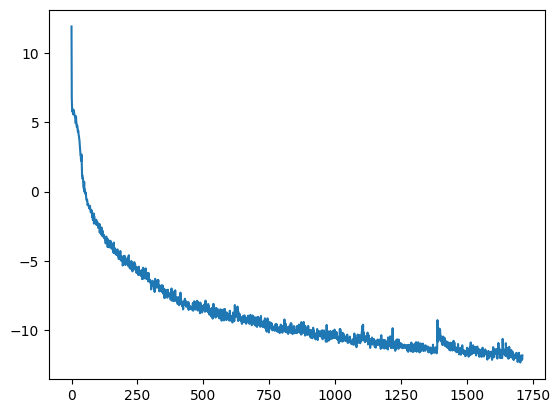

RMSE : [313.41553   58.654972  91.03152   31.602877 143.7694  ] MAE  : [117.99816   35.993095  49.520485  10.611089  54.066265] NLL : 4.531473159790039
Iteration No:  3


/home/dhruv.patel/MI_multitask/retrain_fun.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278 8565 7800]


2023-07-23 18:12:10.074062: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[165477,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[165477,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-23 18:12:10.998381: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[165477,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[165477,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-23 18:

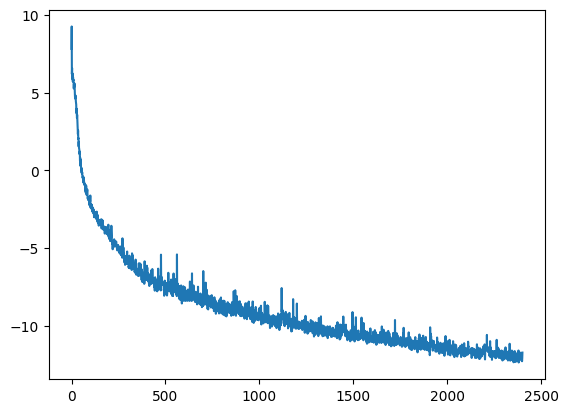

RMSE : [233.56828   56.4779    82.970276  25.374256  91.16976 ] MAE  : [85.054886  34.13606   45.285686   6.8463764 21.309896 ] NLL : 4.627347469329834
Iteration No:  4


/home/dhruv.patel/MI_multitask/retrain_fun.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278 8565 7800 1642]


2023-07-23 18:14:48.390600: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[230292,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[230292,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-23 18:14:49.611409: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[230292,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[230292,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-23 18:

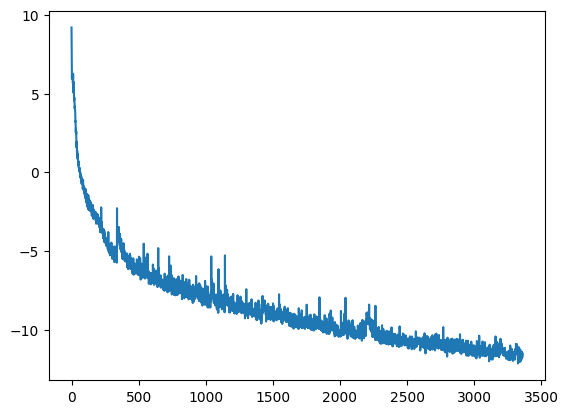

RMSE : [177.99054   53.69765   77.8926    21.054419  86.72201 ] MAE  : [61.145023 31.343246 43.72519   5.514266 17.839622] NLL : 4.39775276184082
Iteration No:  5


/home/dhruv.patel/MI_multitask/retrain_fun.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278 8565 7800 1642 8156]


2023-07-23 18:17:19.257514: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[290323,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[290323,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-23 18:17:20.753935: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[290323,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[290323,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-23 18:

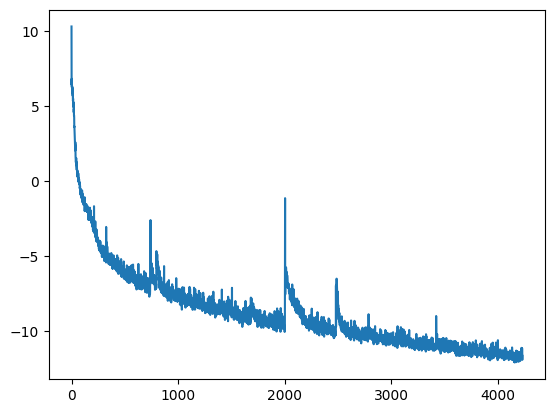

RMSE : [151.53117   52.883873  73.6672    21.596233  70.87072 ] MAE  : [52.01017   30.036503  41.81686    4.9427085 11.236328 ] NLL : 10.614178657531738
Iteration No:  6


/home/dhruv.patel/MI_multitask/retrain_fun.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278 8565 7800 1642 8156  661]


2023-07-23 18:19:34.776912: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[356292,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[356292,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-23 18:19:36.593099: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[356292,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[356292,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-23 18:

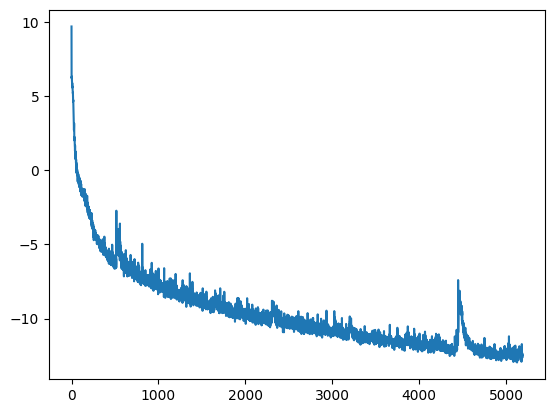

RMSE : [142.52924   53.371708  75.190346  21.00567   91.19671 ] MAE  : [45.371273  29.517084  39.453796   4.8988934 17.88004  ] NLL : 4.523968696594238
Iteration No:  7


/home/dhruv.patel/MI_multitask/retrain_fun.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278 8565 7800 1642 8156  661 5746]


2023-07-23 18:21:44.671305: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[423984,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[423984,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-23 18:21:46.798114: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[423984,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[423984,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"


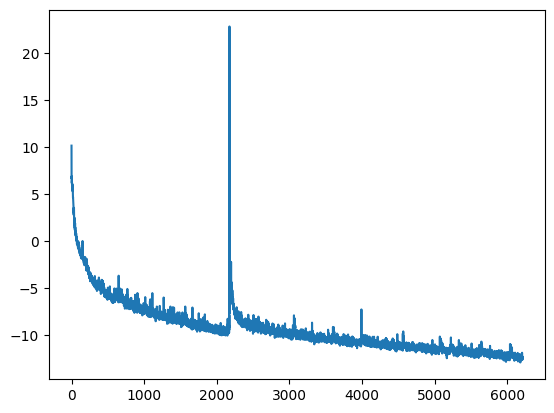

RMSE : [136.25871   53.046814  72.71434   24.934118  63.56762 ] MAE  : [47.41703   29.5335    37.227005   7.3421254 11.637221 ] NLL : 5.3193135261535645
Iteration No:  8


/home/dhruv.patel/MI_multitask/retrain_fun.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278 8565 7800 1642 8156  661 5746 7536]


2023-07-23 18:23:46.360614: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[498428,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[498428,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-23 18:23:48.851023: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[498428,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[498428,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"


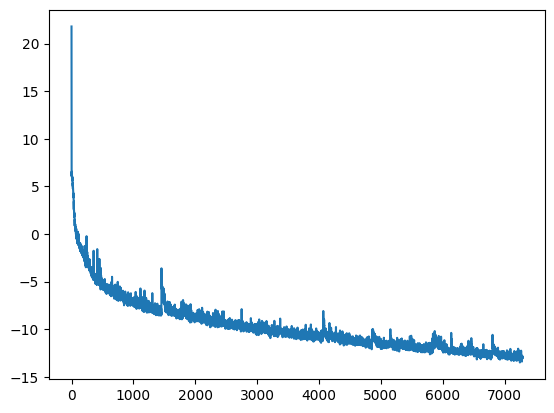

RMSE : [129.43123   52.44127   71.25497   20.272865  61.325134] MAE  : [45.11095  28.805931 35.390022  4.359744 10.13671 ] NLL : 4.319733142852783
Iteration No:  9


/home/dhruv.patel/MI_multitask/retrain_fun.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278 8565 7800 1642 8156  661 5746 7536 8386]


2023-07-23 18:25:44.362795: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[579795,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[579795,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-23 18:25:47.238099: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[579795,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[579795,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"


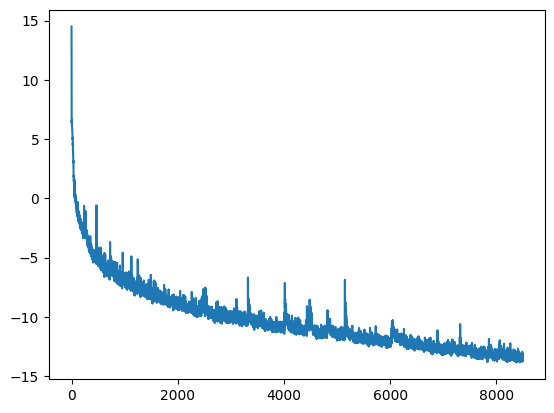

RMSE : [131.38449   51.211052  69.727325  20.797718  61.95109 ] MAE  : [43.651386  27.195623  32.751453   4.9352956 11.388336 ] NLL : 5.442902565002441


In [8]:
total_rmse=[]
houseids=[]
for i in range(len(train_list)):
    # print(len(train_list))
    print("Train Set No:", i+1)
    train_houses = train_list[i]
    test_houses = test_list[i]
    pool_houses = pool_list[i]
    #change 1 - removing train test var from function
    train = data_aggregated[data_aggregated["dataid"].isin(train_houses)] 
    test = data_aggregated[data_aggregated["dataid"].isin(test_houses)]

    maes = []
    rmse_iter=[]
    houses=[]
    start= ["2018-03-01 00:00:00-06","2018-03-11 00:00:00-06", "2018-03-16 00:00:00-06", "2018-03-21 00:00:00-06", "2018-03-26 00:00:00-06", "2018-04-01 00:00:00-06","2018-04-06 00:00:00-06","2018-04-11 00:00:00-06","2018-04-16 00:00:00-06","2018-04-21 00:00:00-06"]
    end= ["2018-03-10 23:59:00-06","2018-03-15 23:59:00-06","2018-03-20 23:59:00-06","2018-03-25 23:59:00-06","2018-03-31 23:59:00-06","2018-04-05 23:59:00-06", "2018-04-10 23:59:00-06", "2018-04-15 23:59:00-06", "2018-04-20 23:59:00-06", "2018-04-25 23:59:00-06"]
    dates = ["2018-03-01 00:00:00-06","2018-03-06 00:00:00-06", "2018-03-11 00:00:00-06", "2018-03-16 00:00:00-06", "2018-03-21 00:00:00-06", "2018-03-27 00:00:00-06","2018-04-01 00:00:00-06","2018-04-06 00:00:00-06","2018-04-11 00:00:00-06","2018-04-16 00:00:00-06"]
    for j in range(len(start)):
        # print(len(start))
        print("Iteration No: ",j)
        if(j==0):
            house, houseid,rmsee, maee, train, test= retrain(0, start[j], end[j], pool_houses, train, test, dates[j], data_aggregated)
            rmse_iter.append(rmsee)
            maes.append(maee)
            houses.append(house)
            pool_houses= np.delete(pool_houses, houseid)
        elif(j==10):
            house, houseid,rmsee, maee, train, test= retrain(house, start[j], end[j], pool_houses, train, test, dates[j], data_aggregated)
            rmse_iter.append(rmsee)
            maes.append(maee)
        else:
            house, houseid,rmsee, maee, train, test= retrain(house, start[j], end[j], pool_houses, train, test, dates[j], data_aggregated)
            rmse_iter.append(rmsee)
            maes.append(maee)
            houses.append(house)
            pool_houses= np.delete(pool_houses, houseid)
    total_rmse.append(rmse_iter)
    houseids.append(houses)


In [9]:
houseids

[[9278, 8565, 7800, 1642, 8156, 661, 5746, 7536, 8386, 9160]]

In [10]:
rmse_iter = np.array(rmse_iter)
rmse_iter

array([[838.97186 ,  65.4115  , 283.74158 ,  52.868984, 462.44693 ],
       [651.47064 ,  63.11932 , 118.34574 , 112.265045, 320.69913 ],
       [313.41553 ,  58.654972,  91.03152 ,  31.602877, 143.7694  ],
       [233.56828 ,  56.4779  ,  82.970276,  25.374256,  91.16976 ],
       [177.99054 ,  53.69765 ,  77.8926  ,  21.054419,  86.72201 ],
       [151.53117 ,  52.883873,  73.6672  ,  21.596233,  70.87072 ],
       [142.52924 ,  53.371708,  75.190346,  21.00567 ,  91.19671 ],
       [136.25871 ,  53.046814,  72.71434 ,  24.934118,  63.56762 ],
       [129.43123 ,  52.44127 ,  71.25497 ,  20.272865,  61.325134],
       [131.38449 ,  51.211052,  69.727325,  20.797718,  61.95109 ]],
      dtype=float32)

In [11]:
maes = np.array(maes) 

In [12]:
appliances = ['air', 'refrigerator' , 'furnace', 'clothewasher', 'dishwasher']
for i in range(5):
    d = pd.DataFrame(rmse_iter[:,i])
    d1 = pd.DataFrame(maes[:,i])
    if not os.path.exists(f'{appliances[i]}'):
        os.mkdir(f'{appliances[i]}')
    # Save the DataFrame to a CSV file
    d.to_csv(os.path.join(f'{appliances[i]}', "new_RMSE.csv"), index=False)
    d1.to_csv(os.path.join(f'{appliances[i]}', "new_MAE.csv"), index=False)
    
house_df= pd.DataFrame(houseids)
house_df.to_csv("new_houseids.csv")


In [13]:
d = pd.DataFrame(rmse_iter)
d.to_csv("new_errors.csv")

In [14]:
house_df= pd.DataFrame(houseids)
house_df.to_csv("new_houseids.csv")

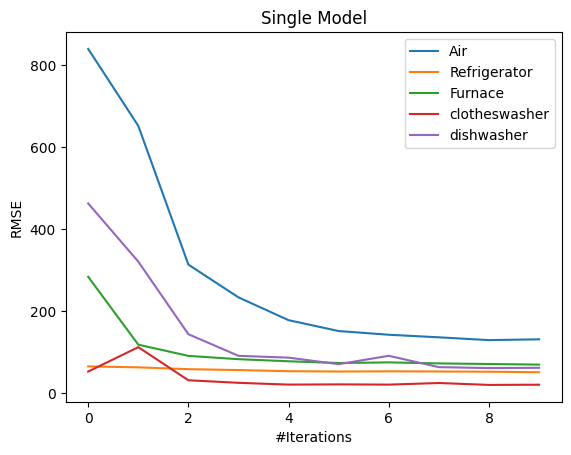

In [15]:
for i in range(5):
    plt.plot(d[i])
    plt.xlabel("#Iterations")
    plt.ylabel("RMSE")
    plt.title("Single Model")
    plt.legend(['Air', 'Refrigerator', 'Furnace', 'clotheswasher', 'dishwasher'])



In [16]:
import numpy as np
import matplotlib.pyplot as plt
scaled_total_rmse =[]
for i in range(5):
    a = np.array(d[i])
    ans = (a-a.min())/(a.max()-a.min())
    scaled_total_rmse.append(ans)

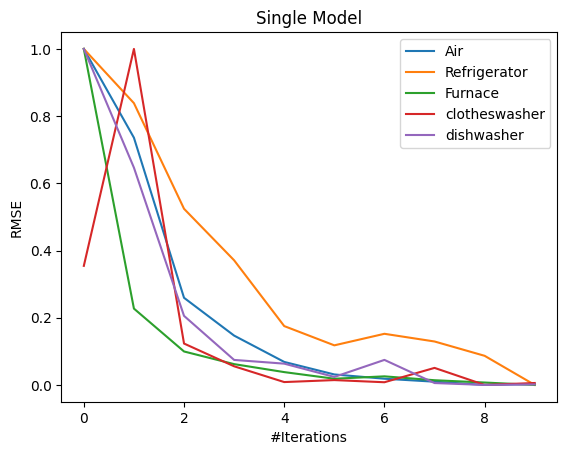

In [17]:
for i in range(5):
    plt.plot(scaled_total_rmse[i])
    plt.xlabel("#Iterations")
    plt.ylabel("RMSE")
    plt.title("Single Model")
    plt.legend(['Air', 'Refrigerator', 'Furnace', 'clotheswasher', 'dishwasher'])

In [18]:
maes_df = pd.DataFrame(maes)


In [19]:
maes_df

,0,1,2,3,4
0,328.138306,41.170593,121.629692,22.690022,248.003448
1,259.634979,40.192894,62.075867,44.703426,154.190857
2,117.998161,35.993095,49.520485,10.611089,54.066265
3,85.054886,34.136059,45.285686,6.846376,21.309896
4,61.145023,31.343246,43.725189,5.514266,17.839622
5,52.010170,30.036503,41.816860,4.942708,11.236328
6,45.371273,29.517084,39.453796,4.898893,17.880039
7,47.417030,29.533501,37.227005,7.342125,11.637221
8,45.110950,28.805931,35.390022,4.359744,10.136710
9,43.651386,27.195623,32.751453,4.935296,11.388336


In [20]:
print(data_aggregated['air1'].mean()*1000, data_aggregated['refrigerator1'].mean()*1000, data_aggregated['furnace1'].mean()*1000, data_aggregated['clotheswasher1'].mean()*1000, data_aggregated['dishwasher1'].mean()*1000)

387.9863080087092 145.74786692064612 179.39920680753877 26.982003007108773 16.52270251359823
